In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/vinoth/Apps/anaconda3/envs/stanford20/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
% matplotlib inline

In [3]:
DATA_FILE = 'data/birth_life_2010.txt'

In [4]:
text = open(DATA_FILE, 'r').readlines()[1:]
births, deaths = [], []
for line in text:
    data = line[:-1].split('\t')[1:]
    births.append(float(data[0]))
    deaths.append(float(data[1]))
    
data = np.asarray(list(zip(births, deaths)), dtype=np.float32)
n_samples = len(data)

In [5]:
X = tf.placeholder(tf.float32, name ="X")
Y = tf.placeholder(tf.float32, name ="X")

In [6]:
w = tf.get_variable("Weight", initializer=0.0)
b = tf.get_variable("Bias", initializer=0.0)

In [7]:
Y_predicted = tf.add(tf.multiply(w, X), b)

In [8]:
loss = tf.square(Y - Y_predicted, name="loss")

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [10]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    sess.run(tf.variables_initializer([w, b]))
    
    for i in range(100):
        total_loss = 0
        for x, y in data:
            _, loss_ = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += loss_
            
        print("Epoch {} : {}".format(i, total_loss/n_samples))
        
    w_out, b_out = sess.run([w, b])
        
writer.close()

Epoch 0 : 1661.863764550287
Epoch 1 : 956.3224439573916
Epoch 2 : 844.6737683409139
Epoch 3 : 750.7312372197838
Epoch 4 : 667.659830722252
Epoch 5 : 594.1417484349327
Epoch 6 : 529.0787271179651
Epoch 7 : 471.5003584364135
Epoch 8 : 420.5458252520938
Epoch 9 : 375.45531067297253
Epoch 10 : 335.55436177954664
Epoch 11 : 300.24627770512666
Epoch 12 : 269.00374521501146
Epoch 13 : 241.3595776562824
Epoch 14 : 216.9003910217238
Epoch 15 : 195.25972397061292
Epoch 16 : 176.1137731664483
Epoch 17 : 159.17551683403158
Epoch 18 : 144.19069889799545
Epoch 19 : 130.93503690609023
Epoch 20 : 119.20935661137888
Epoch 21 : 108.83793506244884
Epoch 22 : 99.66458668207358
Epoch 23 : 91.55171666162971
Epoch 24 : 84.37658985632197
Epoch 25 : 78.03213362396008
Epoch 26 : 72.42178616552172
Epoch 27 : 67.46132107331957
Epoch 28 : 63.07563027821873
Epoch 29 : 59.19871881428714
Epoch 30 : 55.77163058824279
Epoch 31 : 52.742706123048954
Epoch 32 : 50.06563247971506
Epoch 33 : 47.70006537150391
Epoch 34 : 45.

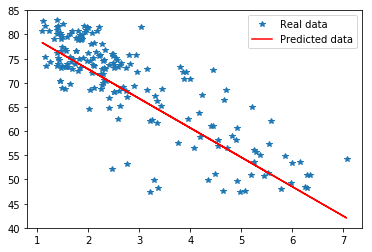

In [11]:
plt.plot(data[:,0], data[:,1], '*', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()